# Machine Learning Class from Udemy

## Part 1 - Data Preprocessing

In [1]:
# import the libraries that will be used
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
# import dataset
dir = '/Users/esousa/transfered/Classes/udemy_machineLearning_A-Z/Part1_DataPreprocessing/'

data = pd.read_csv(dir+'Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Country      10 non-null object
Age          9 non-null float64
Salary       9 non-null float64
Purchased    10 non-null object
dtypes: float64(2), object(2)
memory usage: 400.0+ bytes


In [28]:
# lets separate the features and the targets

X = data.iloc[:,:-1].values # features, independent variables

y = data.iloc[:,3].values # targets, dependent variables

In [29]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

#### Taking care of missing data

One way, would be to remove all samples/rows that have missing data, but this could remove consideral amount of important data.

Another way would be to calculate the mean of those values an fill in the missing data. That is what we do here.

In [30]:
# taking care of the missing data
from sklearn.impute import SimpleImputer

In [31]:
help(SimpleImputer)

Help on class SimpleImputer in module sklearn.impute:

class SimpleImputer(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  SimpleImputer(missing_values=nan, strategy='mean', fill_value=None, verbose=0, copy=True)
 |  
 |  Imputation transformer for completing missing values.
 |  
 |  Read more in the :ref:`User Guide <impute>`.
 |  
 |  Parameters
 |  ----------
 |  missing_values : number, string, np.nan (default) or None
 |      The placeholder for the missing values. All occurrences of
 |      `missing_values` will be imputed.
 |  
 |  strategy : string, optional (default="mean")
 |      The imputation strategy.
 |  
 |      - If "mean", then replace missing values using the mean along
 |        each column. Can only be used with numeric data.
 |      - If "median", then replace missing values using the median along
 |        each column. Can only be used with numeric data.
 |      - If "most_frequent", then replace missing using the most frequent
 |        value alon

In [34]:
imputer = SimpleImputer(strategy='mean')
X[:,1:3] = imputer.fit_transform(X[:,1:3])
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

#### Categorical data

Categorical data need to be converted to number in order to be used in machine learning.

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
# encode the column, thie problem with this implementation is the fact that 
# by giving some countries higher values the machine learning algorithm could mistakenly
# assume some countries are more important than other

labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
onehotencoder = OneHotEncoder(categorical_features=[0], sparse=False)
X = onehotencoder.fit_transform(X)

/Users/esousa/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/esousa/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [41]:
# do a label encoder for the target as well, no need to oneHotEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [42]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [44]:
# split the data set into training and test sets
from sklearn.model_selection import train_test_split

In [45]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=0.25)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. By default, 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [47]:
# feature scaling
from sklearn.preprocessing import StandardScaler
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing.data:

class StandardScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  StandardScaler(copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using the
 |  `transform` method.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual features do not more or less look like 

In [48]:
# the categorical data is scale but in reality it should not <---- this is my personal opinion
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Part 2 - Regression

***
### Section: Simple Linear Regression

In [49]:
dir1 = '/Users/esousa/transfered/Classes/udemy_machineLearning_A-Z/Part2_Regression/'
data = pd.read_csv(dir1+'Salary_Data.csv')
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [50]:
X = data.iloc[:,:-1].values # features
y = data.iloc[:,1].values # targets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1./3., random_state=0)

In [51]:
# Fitting simple linear regression to the training set
from sklearn.linear_model import LinearRegression
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, o

In [52]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
# predicting the test set results
y_pred = regressor.predict(X_test)

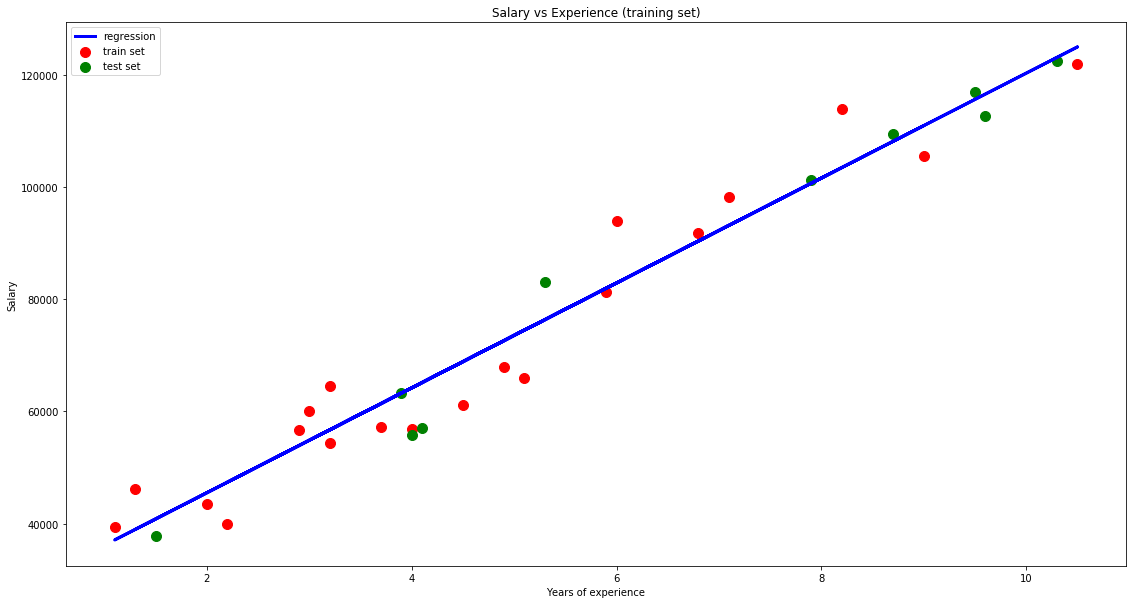

In [54]:
# Visualizing the training set results
plt.figure(figsize=(19,10))
plt.scatter(X_train, y_train, color='red', s=100, label='train set')
plt.scatter(X_test, y_test, color='green', s=100, label='test set')
plt.plot(X_train, regressor.predict(X_train), color='blue', lw=3, label='regression')
plt.title('Salary vs Experience (training set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.legend(loc='upper left')

***
### Section: Multiple Variable Linear Regression

In [55]:
dir1 = '/Users/esousa/transfered/Classes/udemy_machineLearning_A-Z/Part2_Regression/'
data = pd.read_csv(dir1+'50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [56]:
# Multiple Linear Regression
X = data.iloc[:,:-1].values # features
y = data.iloc[:,4].values # targets

# take care of the categorical column, state
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features=[3])
X = onehotencoder.fit_transform(X).toarray()

# Avoind the Dummy Variable Trap
X = X[:,1:]

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

/Users/esousa/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/esousa/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [57]:
# create and fit the data using training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
# predict the test set results
y_pred = regressor.predict(X_test)

In [59]:
# Building the optiaml model using Backward Elimination
import statsmodels.formula.api as sm

In [60]:
# add a column of 1s
X = np.append(arr= np.ones((50,1)).astype(int), values =X , axis = 1)

#### Backward Elimination

We will use the backward elimination algorithm.

1. Select a significance level to stay in the model (e.g. SL=0.05)
2. Fir the full model with all the possible predictors
3. Consider the predictos with the __highest__ P-value. If P>SL, go to step 4, otherwise go to FIN
4. Remove the predictor
5. Fit model without this variable

In [61]:
# optimal matrix of features, matrix containing features that are statistically relevant 
# in the data fitting (high impact on the profit)
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
# ordinary least squares
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           1.34e-27
Time:                        07:55:49   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
# the significant value is SL=0.05 (5%)
# remove the feature with the highest P-value
X_opt = X[:, [0, 1, 3, 4, 5]]
# ordinary least squares
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           8.49e-29
Time:                        07:55:57   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
X_opt = X[:, [0, 3, 4, 5]]
# ordinary least squares
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           4.53e-30
Time:                        07:56:01   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
X_opt = X[:, [0, 3, 5]]
# ordinary least squares
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           2.16e-31
Time:                        08:12:38   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Polynomial Regression

Fit of the form $ y = a + bx_1 + cx_1^2 + ... + zx_1^n$

In [65]:
#dir1 = '/disk1/sousae/Classes/udemy_machineLearning/Machine_Learning_A-Z/Part2_Regression/'
data = pd.read_csv(dir1+'Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [66]:
# Polynomial Regression
X = data.iloc[:,1:2].values # features
y = data.iloc[:,2].values # targets

# The dataset is very small so there will be no split into training and test sets

# fitting linear regression to datset
lin_reg = LinearRegression()
lin_reg.fit(X,y)

#fitting polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

In [72]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [68]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)

In [69]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

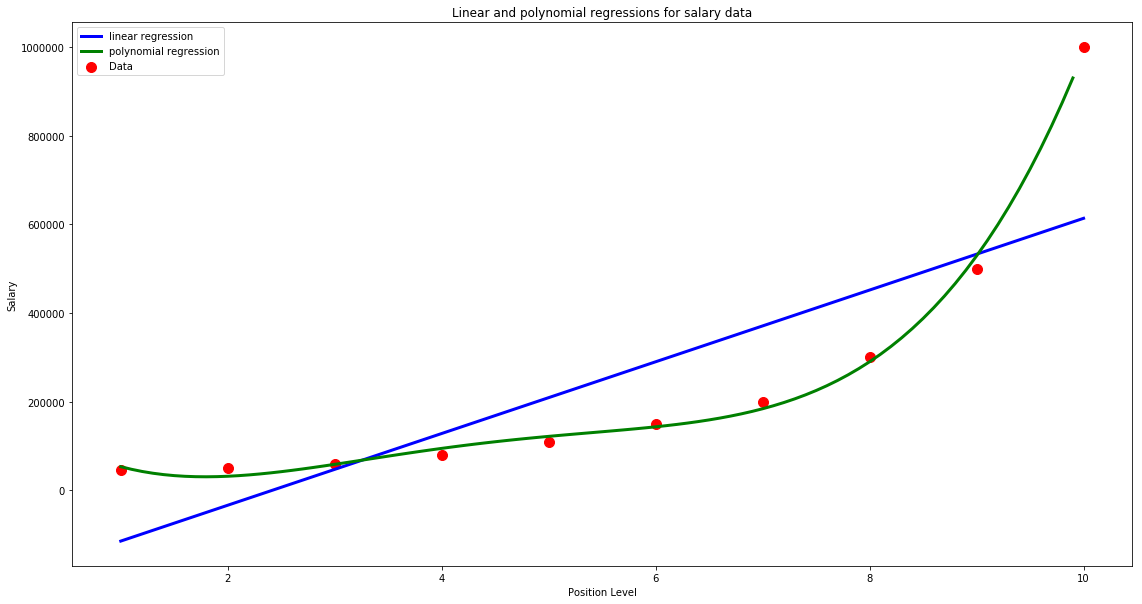

In [70]:
# Visualize the linear and polynomial regression results
plt.figure(figsize=(19,10))
plt.scatter(X, y, color='red', label='Data', s=100)
plt.plot(X, lin_reg.predict(X), color='blue', label='linear regression', lw=3)

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color='green', label='polynomial regression', lw=3)

plt.title('Linear and polynomial regressions for salary data')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(loc='upper left')

In [79]:
# predict a new result with linear regression
lin_reg.predict(np.array([6.5]).reshape(-1, 1))

array([330378.78787879])

In [80]:
# predict a new result with polynomial regression
lin_reg_2.predict(poly_reg.fit_transform(np.array([6.5]).reshape(-1, 1)))

array([158862.45265153])

### Support Vector Regression (SVR)

In [81]:
#dir1 = '/disk1/sousae/Classes/udemy_machineLearning/Machine_Learning_A-Z/Part2_Regression/'
data = pd.read_csv(dir1+'Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [82]:
# SVR
X = data.iloc[:,1:2].values # features
y = data.iloc[:,2:3].values # targets

# in this case we need to apply feature scaling
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

# fit SVR to dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/Users/esousa/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/esousa/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/esousa/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/esousa/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/esousa/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarni

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

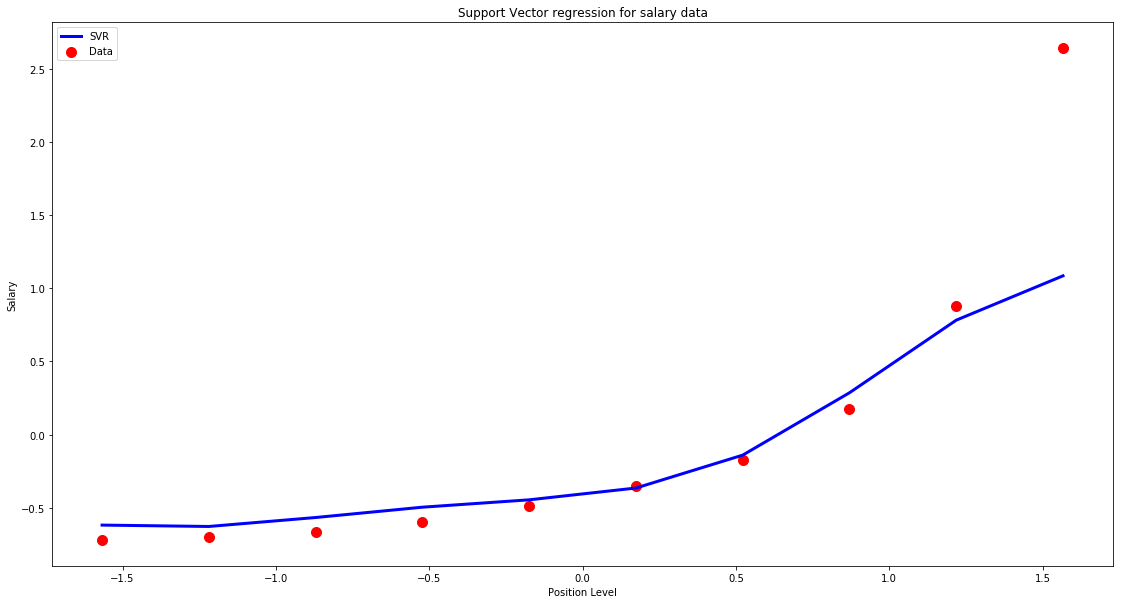

In [83]:
# visualize
plt.figure(figsize=(19,10))
plt.scatter(X, y, color='red', label='Data', s=100)
plt.plot(X, regressor.predict(X), color='blue', label='SVR', lw=3)

#X_grid = np.arange(min(X), max(X), 0.1)
#X_grid = X_grid.reshape((len(X_grid), 1))
#plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color='green', label='polynomial regression', lw=3)

plt.title('Support Vector regression for salary data')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(loc='upper left')

In [84]:
# predict a new result
# ++++ REMEMBER THE DATA WAS SCALED, TAKE THAT INTO ACCOUNT ++++
y_pred = regressor.predict(sc_X.transform(np.array([[6.5]])))
y_pred = sc_y.inverse_transform(y_pred)
print(y_pred)

[170370.0204065]


### Decision Tree Regression

Decision Tree is a discrete regression model. The model is not interesting in 1D but fairs much better in higher dimensions. 

__Information entropy__: defined as the average amount of information produced by a stochastic source of data.

    * How much information there is in an event
    * In general, the more uncertain or random the event is, the more information it will contain

In [85]:
#dir1 = '/disk1/sousae/Classes/udemy_machineLearning/Machine_Learning_A-Z/Part2_Regression/'
data = pd.read_csv(dir1+'Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [86]:
# Decision Tree Regression
X = data.iloc[:,1:2].values # features
y = data.iloc[:,2].values # targets

# fit the decision tree regression to the dataset
from sklearn.tree import DecisionTreeRegressor
help(DecisionTreeRegressor)

Help on class DecisionTreeRegressor in module sklearn.tree.tree:

class DecisionTreeRegressor(BaseDecisionTree, sklearn.base.RegressorMixin)
 |  DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="mse")
 |      The function to measure the quality of a split. Supported criteria
 |      are "mse" for the mean squared error, which is equal to variance
 |      reduction as feature selection criterion and minimizes the L2 loss
 |      using the mean of each terminal node, "friedman_mse", which uses mean
 |      squared error with Friedman's improvement score for potential splits,
 |      and "mae" for the mean abso

In [87]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

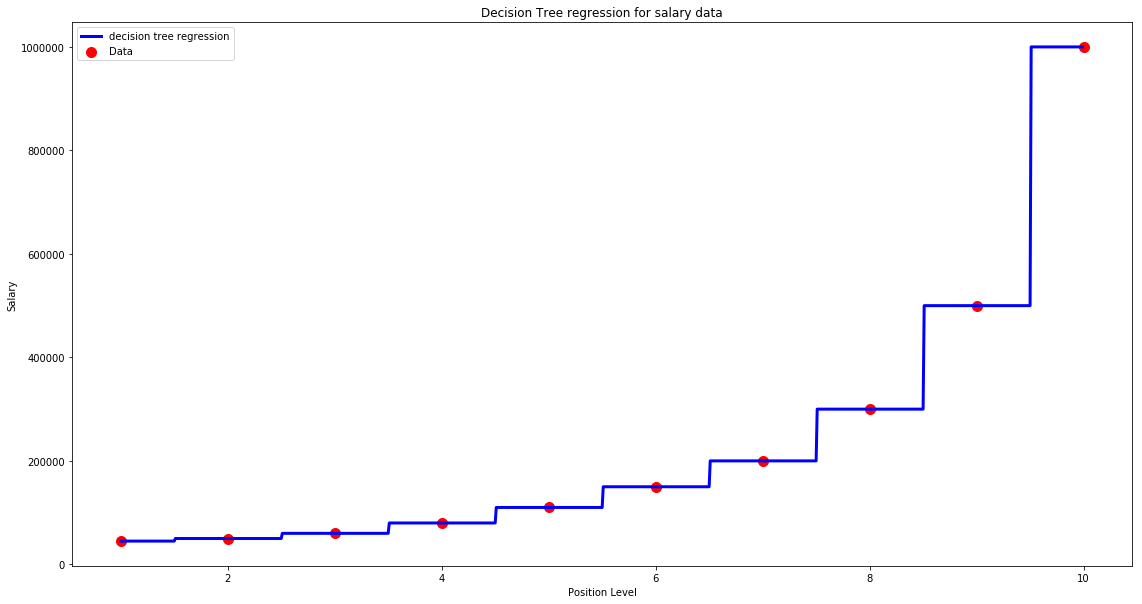

In [88]:
# visualize
plt.figure(figsize=(19,10))
plt.scatter(X, y, color='red', label='Data', s=100)

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, regressor.predict(X_grid), color='blue', label='decision tree regression', lw=3)

plt.title('Decision Tree regression for salary data')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(loc='upper left')

In [90]:
y_pred = regressor.predict(np.array([6.5]).reshape(-1, 1))
print(y_pred)

[150000.]


### Random Forest Regression

- version of ensemble learning, where you take the same algorithm multiple times
- more stable, new data can influence one tree but have less effect on all trees

In [91]:
#dir1 = '/disk1/sousae/Classes/udemy_machineLearning/Machine_Learning_A-Z/Part2_Regression/'
data = pd.read_csv(dir1+'Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [92]:
# Decision Tree Regression
X = data.iloc[:,1:2].values # features
y = data.iloc[:,2].values # targets

# fitting random forest regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300, random_state=0)

regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

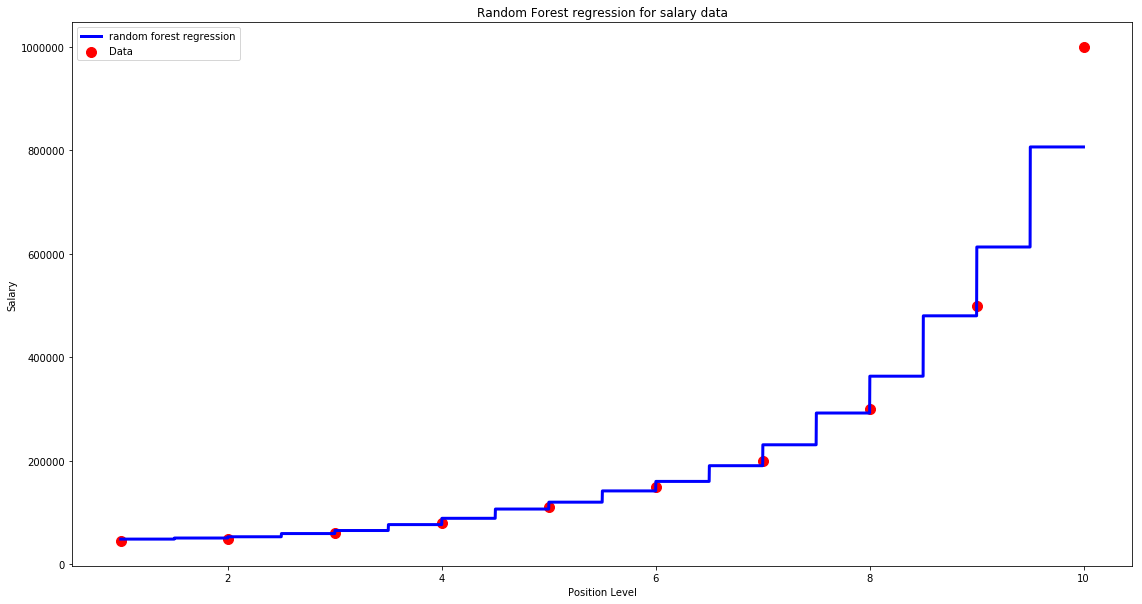

In [93]:
# visualize
plt.figure(figsize=(19,10))
plt.scatter(X, y, color='red', label='Data', s=100)

X_grid = np.arange(min(X), max(X), 0.001)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, regressor.predict(X_grid), color='blue', label='random forest regression', lw=3)

plt.title('Random Forest regression for salary data')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(loc='upper left')

In [95]:
y_pred = regressor.predict(np.array([6.5]).reshape(-1, 1))
print(y_pred)

[160333.33333333]


### R-squared

Sum of square of residuals:
$$ SS_{res} = \sum (y_i - \hat{y}_i)^2 $$ (difference between what it is to what the fiting line says it should be)

Total sum of squares
$$ SS_{tot} = \sum (y_i - y_{avg})^2 $$ (difference between what it is and the average of all values)

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$ (how good is your fit compared to the average fit)

### Adjusted R-squared

$$ AdjR^2 = 1 - (1-R^2)\frac{n-1}{n-p-1} $$

- p: number of regressors
- n: sample size
- it penalizes for features that do __not__ improve the model

In [96]:
from IPython.display import IFrame
IFrame("./Regression-Pros-Cons.pdf", width=1000, height=600)